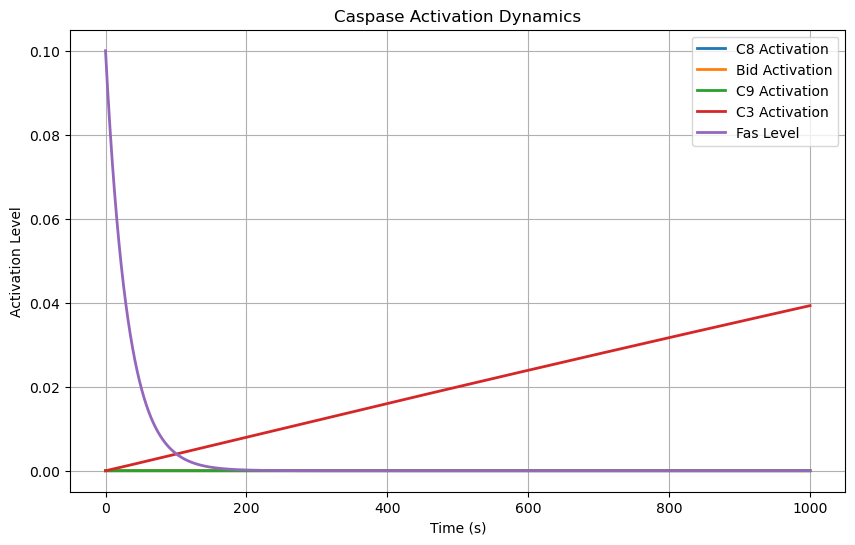

In [3]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import random
# Here we define the ODEs
def caspase_cascade_ode(y, t, k1, k2, k3, k4, k5, k6, k7, k8, k9, kfas,  Kd, n, m):
    C8, B, C9, C3, FasL = y

    # Caspase-8 activation , k2 is degradation
    dC8_dt = k1 * (FasL**n) / (Kd**n + FasL**n) - k2 * C8

    # Bid cleavage and activation, k4 is degradation
    dB_dt = k3 * C8 - k4 * B

    # Caspase-9 activation , k6 is degradation
    dC9_dt = k5 * B - k6 * C9

    # Caspase-3 activation , 
    dC3_dt = k7 * C8 + k8 * (C9**m) - k9 * C3

    dfasL_dt = FasL - kfas*FasL

    return [dC8_dt, dB_dt, dC9_dt, dC3_dt, dfasL_dt]

# Here we define parameters


params = {
    "k1": 1.0e-4,    
    "k2": 6.5e-3,  # 6.5e-3  
    "k3": 5.0e-4,   
    "k4": 1.667e-5,   
    "k5": 2.0e-4,   
    "k6": 6.5e-3,   
    "k7": 5.8e-4,   
    "k8": 5.0e-5,  
    "k9": 9.667e-5,   # 9.667e-5
    "kfas": 1.0e-2,
    "Kd": 1.032,  
    "n": 2,      
    "m": 2,      
}



y0 = [0, 0, 0, 0, 0.1]

# Here we define simulation time
t = np.linspace(0, 1000, 15000) 


FasL = 0.1 # FasL level 
sol = odeint(caspase_cascade_ode, y0, t, args=(
    params["k1"], params["k2"], params["k3"], params["k4"], params["k5"], params["k6"],
    params["k7"], params["k8"], params["k9"], params["Kd"], params["n"], params["m"], params["kfas"]))

plt.figure(figsize=(10, 6))
plt.plot(t, sol[:, 0], label="C8 Activation", linestyle='-', linewidth=2)
plt.plot(t, sol[:, 1], label="Bid Activation", linestyle='-', linewidth=2)
plt.plot(t, sol[:, 2], label="C9 Activation", linestyle='-', linewidth=2)
plt.plot(t, sol[:, 3], label="C3 Activation", linestyle='-', linewidth=2)
plt.plot(t, sol[:, 4], label="Fas Level", linestyle='-', linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Activation Level")
plt.title("Caspase Activation Dynamics")
plt.legend()
plt.grid()
plt.show()